[RQ3] Do the all trips last the same? Let's put our attention on the distribution of trip's duration. Provide a plot for it and comment what you see. Run this analysis for NYC and for each borough (and obviously comment the results!).

In [1]:
#Libraries
import pandas as pd
import numpy as np
import seaborn as sns 
%matplotlib inline
import matplotlib.pyplot as plt
import functions

In [2]:
# directory path for csv files (dataset from Jan to Jun 2018)
df_names=['data/yellow_tripdata_2018-01.csv','data/yellow_tripdata_2018-02.csv',
          'data/yellow_tripdata_2018-03.csv','data/yellow_tripdata_2018-04.csv',
         'data/yellow_tripdata_2018-05.csv','data/yellow_tripdata_2018-06.csv']

# taxi_zone_lookup.csv file
taxi_zone_lookup = pd.read_csv('data/taxi_zone_lookup.csv')

# names of the boroughs
borough_lst = list(np.unique(taxi_zone_lookup.Borough))

In [3]:
trip_dur_lst=[]
for i,df_name in enumerate (df_names):
        # load the ith dataframe, taking only the t_pickup_datetime column
        df = pd.read_csv(df_name,usecols= ['tpep_pickup_datetime','tpep_dropoff_datetime','trip_distance'], 
                         parse_dates= ["tpep_pickup_datetime",'tpep_dropoff_datetime'])#,nrows=100)
        
        trip_dur_lst.append(df['tpep_dropoff_datetime']-df['tpep_pickup_datetime'])

In [4]:
df=pd.concat(trip_dur_lst,axis=0)/ np.timedelta64(1, 's')

In [5]:
df.head()

0     346.0
1    1479.0
2     253.0
3     356.0
4     212.0
dtype: float64

In [6]:
df[df<0]

377998    -4226708.0
1124139      -3983.0
dtype: float64

In [7]:
df[(df>1000) & (df<10000)].count()

2140204

In [8]:
df.shape

(7644500,)

(array([7.622986e+06, 4.704000e+03, 1.052100e+04, 1.000000e+00,
        1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([1.000000e+00, 4.225030e+04, 8.449960e+04, 1.267489e+05,
        1.689982e+05, 2.112475e+05, 2.534968e+05, 2.957461e+05,
        3.379954e+05, 3.802447e+05, 4.224940e+05]),
 <a list of 10 Patch objects>)

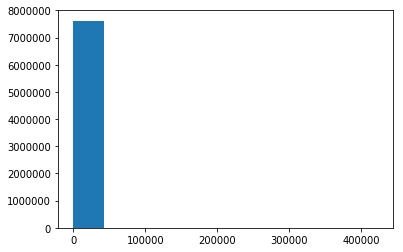

In [9]:
plt.hist(df[df>0])

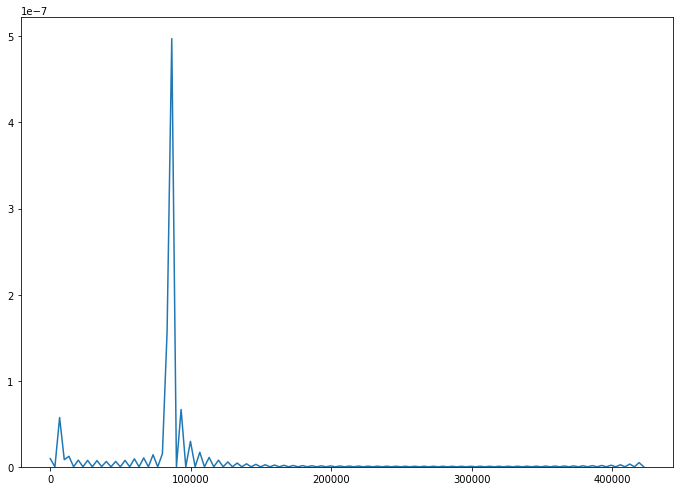

In [10]:
import seaborn as sns
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.distplot(df[df>0],kde=True,hist=False,norm_hist=True)

In [11]:
mean=df[df>0].mean()
mean

1011.4569767225689

In [12]:
std=df[df>0].std()
std

3805.245368635361

In [16]:
#def payments_per_borough(borough_lst):
trip_dur_lst=[]
borough_data_lst=[]
for i,df_name in enumerate(df_names): #repeating it for every file(aka month) 
        # load the ith dataframe, taking only the t_pickup_datetime column
        df = pd.read_csv(df_name,usecols= ['tpep_pickup_datetime','tpep_dropoff_datetime','PULocationID'], 
                         parse_dates= ["tpep_pickup_datetime",'tpep_dropoff_datetime'],nrows=100000)
        # merging it with taxi_zone_lookup file(left-join) 
        df=pd.merge(df,taxi_zone_lookup,how='left',left_on='PULocationID',right_on='LocationID')
        df['trip_duration']=(df['tpep_dropoff_datetime']-df['tpep_pickup_datetime'])/ np.timedelta64(1, 's')
        trip_dur_lst.append(df['trip_duration'])    
        borough_data_lst.append(df['Borough']) 
trip_dur_lst_series=pd.concat(trip_dur_lst,axis=0)
borough_data_series=pd.concat(borough_data_lst,axis=0)
df=pd.concat([trip_dur_lst_series,borough_data_series],axis=1)
del trip_dur_lst_series
del borough_data_series

In [17]:
df.head()

,trip_duration,Borough
0,346.0,Manhattan
1,1479.0,Manhattan
2,253.0,Manhattan
3,356.0,Manhattan
4,212.0,Manhattan


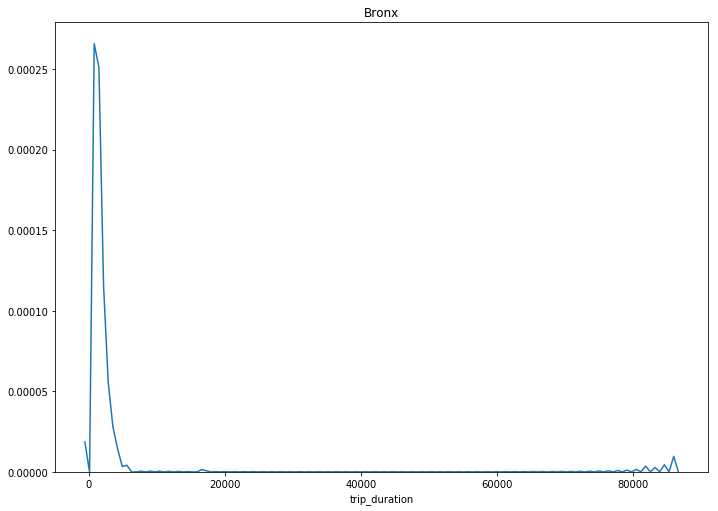

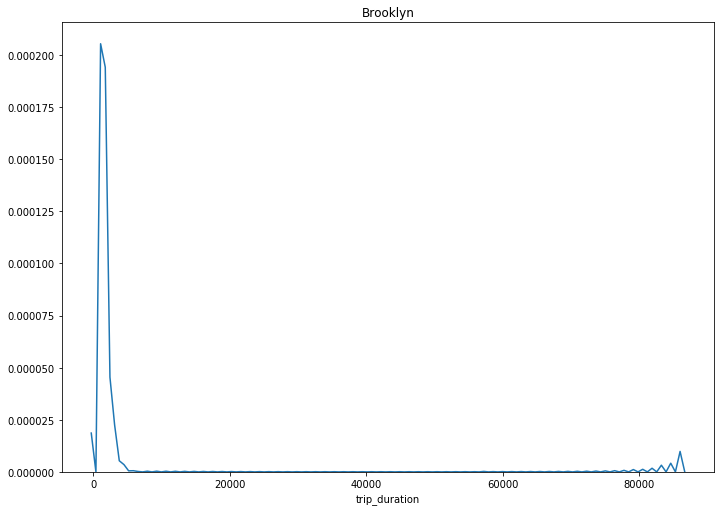

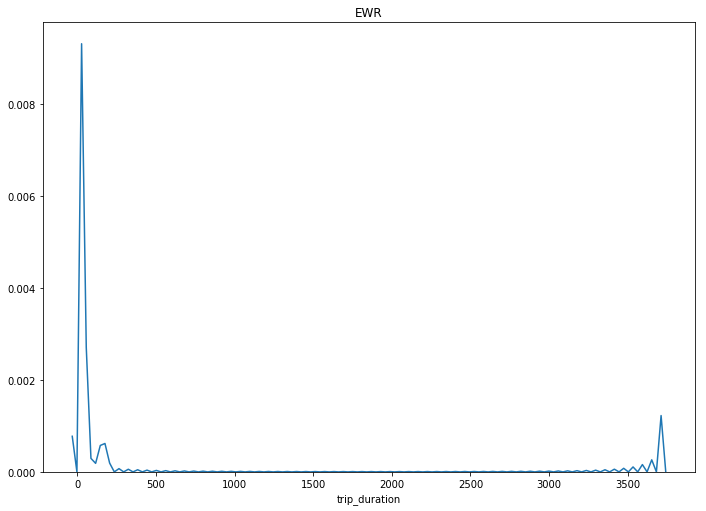

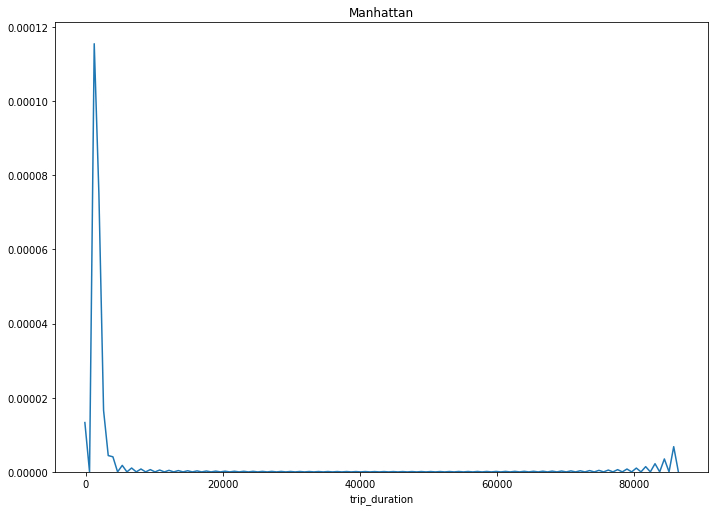

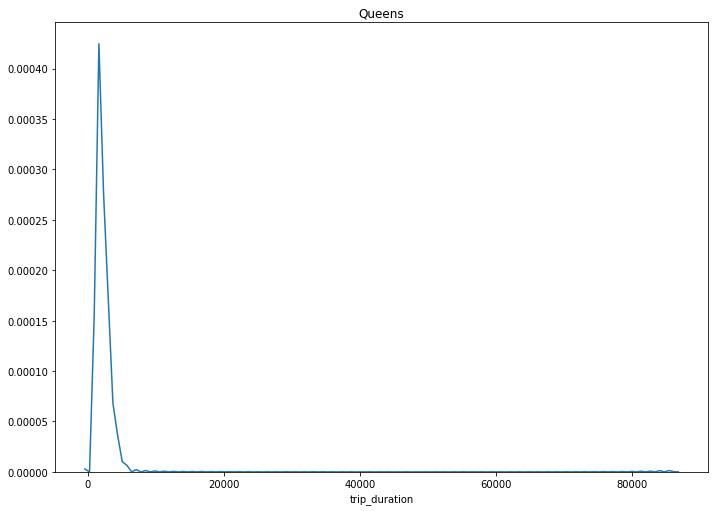

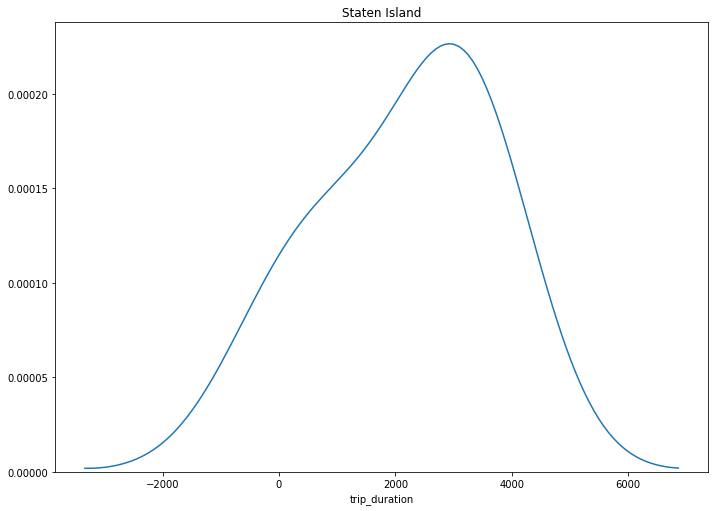

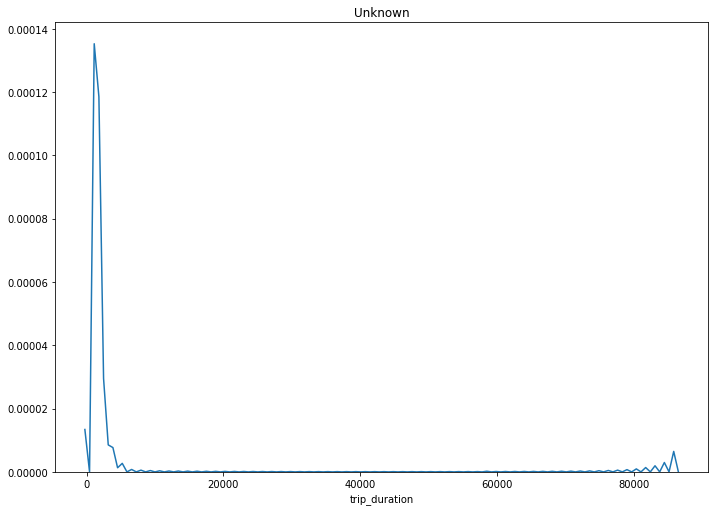

In [19]:
for bor in borough_lst:
    fig, ax = plt.subplots()
    fig.set_size_inches(11.7, 8.27)
    plt.title(bor)
    ax = sns.distplot(df[df.Borough==bor].loc[:,'trip_duration'],kde=True,hist=False)